In [1]:
import pandas as pd
import numpy as np
from utils.feature_engineering import SolarFeatureEngineering
from utils.imputation import ImputationPipeline

In [2]:
df=pd.read_csv('dataset/train.csv')

In [3]:
df

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency
0,0,7.817315,576.179270,41.24308670850264,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,62.494044,12.82491203459621,1018.8665053152533,A1,NaN,NaN,0.562096
1,1,24.785727,240.003973,1.3596482765960705,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,43.851238,12.012043660984917,1025.6238537572883,D4,E00,dual-axis,0.396447
2,2,46.652695,687.612799,91.26536837560256,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,NaN,1.814399755560454,1010.9226539809573,C3,E00,NaN,0.573776
3,3,53.339567,735.141179,96.19095521176159,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,67.361473,8.736258932034128,1021.8466633134253,A1,NaN,dual-axis,0.629009
4,4,5.575374,12.241203,27.495073003585226,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,3.632000,0.52268384077164,1008.5559577591927,B2,E00,fixed,0.341874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,16.868428,NaN,93.53031757838667,14.393967,3.0,0.738911,12.147711,3.005355,26.206810,1.733013,12.594122273332914,1018.3744670739436,B2,E02,tracking,0.664907
19996,19996,53.415061,296.970303,93.98571391279083,25.997012,2.0,0.513061,0.000000,0.532119,65.000000,64.558667,0.9769909288128159,1016.081102065643,D4,E00,fixed,0.354070
19997,19997,2.442727,660.328019,37.9689180401391,32.818396,9.0,0.548602,13.047950,4.075498,11.584869,57.730134,4.750937249871706,1009.6844614602336,D4,NaN,tracking,0.419734
19998,19998,NaN,632.760700,43.01470184078199,19.063517,4.0,NaN,0.000000,1.068906,21.149351,78.123689,11.304158443374758,1006.6738746072241,A1,E00,tracking,0.661963


In [4]:
def fix_data_types(df, dataset_name):
        """Fix data type inconsistencies for specific columns"""
        df_fixed = df.copy()
        
        # Define columns that should be numeric
        numeric_columns_to_fix = ['humidity', 'wind_speed', 'pressure']
        
        print(f"\n=== FIXING DATA TYPES FOR {dataset_name} ===")
        
        for col in numeric_columns_to_fix:
            if col in df_fixed.columns:
                print(f"\nProcessing {col}:")
                print(f"Original dtype: {df_fixed[col].dtype}")
                
                # Check for non-numeric values before conversion
                if df_fixed[col].dtype == 'object':
                    # Display unique non-numeric values
                    try:
                        # Try to convert to numeric and see what fails
                        numeric_conversion = pd.to_numeric(df_fixed[col], errors='coerce')
                        non_numeric_mask = pd.isna(numeric_conversion) & df_fixed[col].notna()
                        
                        if non_numeric_mask.any():
                            print(f"Non-numeric values found in {col}:")
                            non_numeric_values = df_fixed.loc[non_numeric_mask, col].value_counts()
                            print(non_numeric_values.head(10))
                            
                            # Handle common non-numeric patterns
                            df_fixed[col] = df_fixed[col].astype(str)
                            
                            # Remove common problematic characters
                            df_fixed[col] = df_fixed[col].str.replace(r'[^\d.-]', '', regex=True)
                            df_fixed[col] = df_fixed[col].str.strip()
                            
                            # Handle empty strings
                            df_fixed[col] = df_fixed[col].replace('', np.nan)
                            df_fixed[col] = df_fixed[col].replace('nan', np.nan)
                            
                        # Convert to numeric
                        df_fixed[col] = pd.to_numeric(df_fixed[col], errors='coerce')
                        
                        print(f"Converted dtype: {df_fixed[col].dtype}")
                        print(f"Missing values after conversion: {df_fixed[col].isnull().sum()}")
                        print(f"Valid numeric values: {df_fixed[col].notna().sum()}")
                        
                        # Basic statistics for converted column
                        if df_fixed[col].notna().any():
                            print(f"Min: {df_fixed[col].min():.3f}")
                            print(f"Max: {df_fixed[col].max():.3f}")
                            print(f"Mean: {df_fixed[col].mean():.3f}")
                            
                    except Exception as e:
                        print(f"Error converting {col}: {str(e)}")
                else:
                    print(f"{col} is already numeric type: {df_fixed[col].dtype}")
        
        return df_fixed

In [5]:
df = fix_data_types(df, "TRAINING DATA")


=== FIXING DATA TYPES FOR TRAINING DATA ===

Processing humidity:
Original dtype: object
Non-numeric values found in humidity:
humidity
unknown    50
error      40
badval     37
Name: count, dtype: int64
Converted dtype: float64
Missing values after conversion: 127
Valid numeric values: 19873
Min: 0.011
Max: 99.995
Mean: 50.066

Processing wind_speed:
Original dtype: object
Non-numeric values found in wind_speed:
wind_speed
badval     42
error      41
unknown    36
Name: count, dtype: int64
Converted dtype: float64
Missing values after conversion: 119
Valid numeric values: 19881
Min: 0.001
Max: 14.999
Mean: 7.413

Processing pressure:
Original dtype: object
Non-numeric values found in pressure:
pressure
unknown    46
error      45
badval     44
Name: count, dtype: int64
Converted dtype: float64
Missing values after conversion: 135
Valid numeric values: 19865
Min: 970.087
Max: 1052.866
Mean: 1012.981


In [6]:
df = ImputationPipeline().fit_transform(df)

=== FITTING IMPUTATION PIPELINE ===
Dropping 34 rows with temperature > 70
Converting 424 negative irradiance values to absolute values
Imputing 32 rows where cloud_coverage > 100 with median = 49.60936274039607
Total rows to drop: 34
Stage 1: Fitting standard imputers (MICE, KNN)...
  - MICE imputer fitted on: ['irradiance', 'voltage', 'current', 'panel_age', 'cloud_coverage', 'maintenance_count', 'soiling_ratio']
  - KNN imputer fitted on: ['wind_speed', 'pressure', 'temperature', 'module_temperature', 'humidity']
Stage 1: Applying standard imputers...
  - MICE imputation applied to: ['irradiance', 'voltage', 'current', 'panel_age', 'cloud_coverage', 'maintenance_count', 'soiling_ratio']
  - KNN imputation applied to: ['wind_speed', 'pressure', 'temperature', 'module_temperature', 'humidity']
Stage 2: Preparing simple fill values...
  - Error code fill value: NO_ERROR
Stage 2: Applying simple fills...
  - Filled 5907 missing error_code values
Stage 3: Fitting model-based imputers...


In [7]:
df.columns

Index(['id', 'temperature', 'irradiance', 'humidity', 'panel_age',
       'maintenance_count', 'soiling_ratio', 'voltage', 'current',
       'module_temperature', 'cloud_coverage', 'wind_speed', 'pressure',
       'string_id', 'error_code', 'installation_type', 'efficiency'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19966 entries, 0 to 19965
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19966 non-null  int64  
 1   temperature         19966 non-null  float64
 2   irradiance          19966 non-null  float64
 3   humidity            19966 non-null  float64
 4   panel_age           19966 non-null  float64
 5   maintenance_count   19966 non-null  float64
 6   soiling_ratio       19966 non-null  float64
 7   voltage             19966 non-null  float64
 8   current             19966 non-null  float64
 9   module_temperature  19966 non-null  float64
 10  cloud_coverage      19966 non-null  float64
 11  wind_speed          19966 non-null  float64
 12  pressure            19966 non-null  float64
 13  string_id           19966 non-null  object 
 14  error_code          19966 non-null  object 
 15  installation_type   19966 non-null  object 
 16  effi

In [11]:
df_engineered = SolarFeatureEngineering.create_solar_features(df)

In [12]:
df_engineered

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,...,temp_coefficient_effect,expected_irradiance_clean,soiling_loss,irradiance_cloud_ratio,age_degradation_factor,age_category,maintenance_frequency,environmental_stress,wind_cooling_effect,effective_module_temp
0,0,7.817315,576.179270,41.243087,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,...,1.068731,717.355436,141.176166,14.963381,0.807187,Old,0.120716,3.224102,25.649824,-11.958677
1,1,24.785727,240.003973,1.359648,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,...,1.000857,500.575786,260.571813,4.199636,0.880135,Old,0.381362,0.336999,24.024087,3.521009
2,2,46.652695,687.612799,91.265368,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,...,0.913389,836.106607,148.493808,13.390738,0.991022,New,1.602307,42.577754,3.628800,39.734909
3,3,53.339567,735.141179,96.190955,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,...,0.886642,877.750499,142.609320,21.854143,0.889051,Old,0.153913,51.307839,17.472518,40.247918
4,4,5.575374,12.241203,27.495073,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,...,1.077699,22.182814,9.941612,0.125721,0.815664,Old,0.189139,1.532953,1.045368,5.740895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19961,19995,16.868428,621.715243,93.530318,14.393967,3.0,0.738911,12.147711,3.005355,26.206810,...,1.032526,841.393740,219.678498,6.263062,0.913636,Old,0.194882,15.777095,25.188245,1.018565
19962,19996,53.415061,296.970303,93.985714,25.997012,2.0,0.513061,0.000000,0.532119,65.000000,...,0.886340,578.820651,281.850348,8.149271,0.844018,Old,0.074082,50.202526,1.953982,63.046018
19963,19997,2.442727,660.328019,37.968918,32.818396,9.0,0.548602,13.047950,4.075498,11.584869,...,1.090229,1203.656537,543.328518,15.260690,0.803090,Old,0.266127,0.927477,9.501874,2.082994
19964,19998,23.221614,632.760700,43.014702,19.063517,4.0,0.700680,0.000000,1.068906,21.149351,...,1.007114,903.066049,270.305349,27.660085,0.885619,Old,0.199367,9.988708,22.608317,-1.458966


In [13]:
df_engineered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19966 entries, 0 to 19965
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   id                         19966 non-null  int64   
 1   temperature                19966 non-null  float64 
 2   irradiance                 19966 non-null  float64 
 3   humidity                   19966 non-null  float64 
 4   panel_age                  19966 non-null  float64 
 5   maintenance_count          19966 non-null  float64 
 6   soiling_ratio              19966 non-null  float64 
 7   voltage                    19966 non-null  float64 
 8   current                    19966 non-null  float64 
 9   module_temperature         19966 non-null  float64 
 10  cloud_coverage             19966 non-null  float64 
 11  wind_speed                 19966 non-null  float64 
 12  pressure                   19966 non-null  float64 
 13  string_id                  1996

Below feature selection suggests following points:

    1. Using irradiance_normalised is a better alternative over irradiance

    2. Use current and power_output as features

    3. expected_irradiance_clean to be used

    4. age_degradation_factor, soiling_loss 

Starting Complete Feature Importance Analysis
Preprocessing data...
Encoding categorical variables: ['string_id', 'error_code', 'installation_type', 'age_category']
Data shape: (19966, 28)
Features: 28

=== Correlation Analysis ===
Top 10 features by absolute correlation:
                      Feature  Correlation_Raw        P_Value
17      irradiance_normalized         0.564885   0.000000e+00
1                  irradiance         0.564885   0.000000e+00
19  expected_irradiance_clean         0.320736   0.000000e+00
5               soiling_ratio         0.285894   0.000000e+00
7                     current         0.274772   0.000000e+00
15               power_output         0.243192  1.205043e-266
3                   panel_age        -0.183332  1.889377e-150
22     age_degradation_factor         0.183332  1.889377e-150
6                     voltage         0.159259  1.502922e-113
21     irradiance_cloud_ratio         0.122346   1.910648e-67

=== Univariate Feature Selection ===
Top 10 

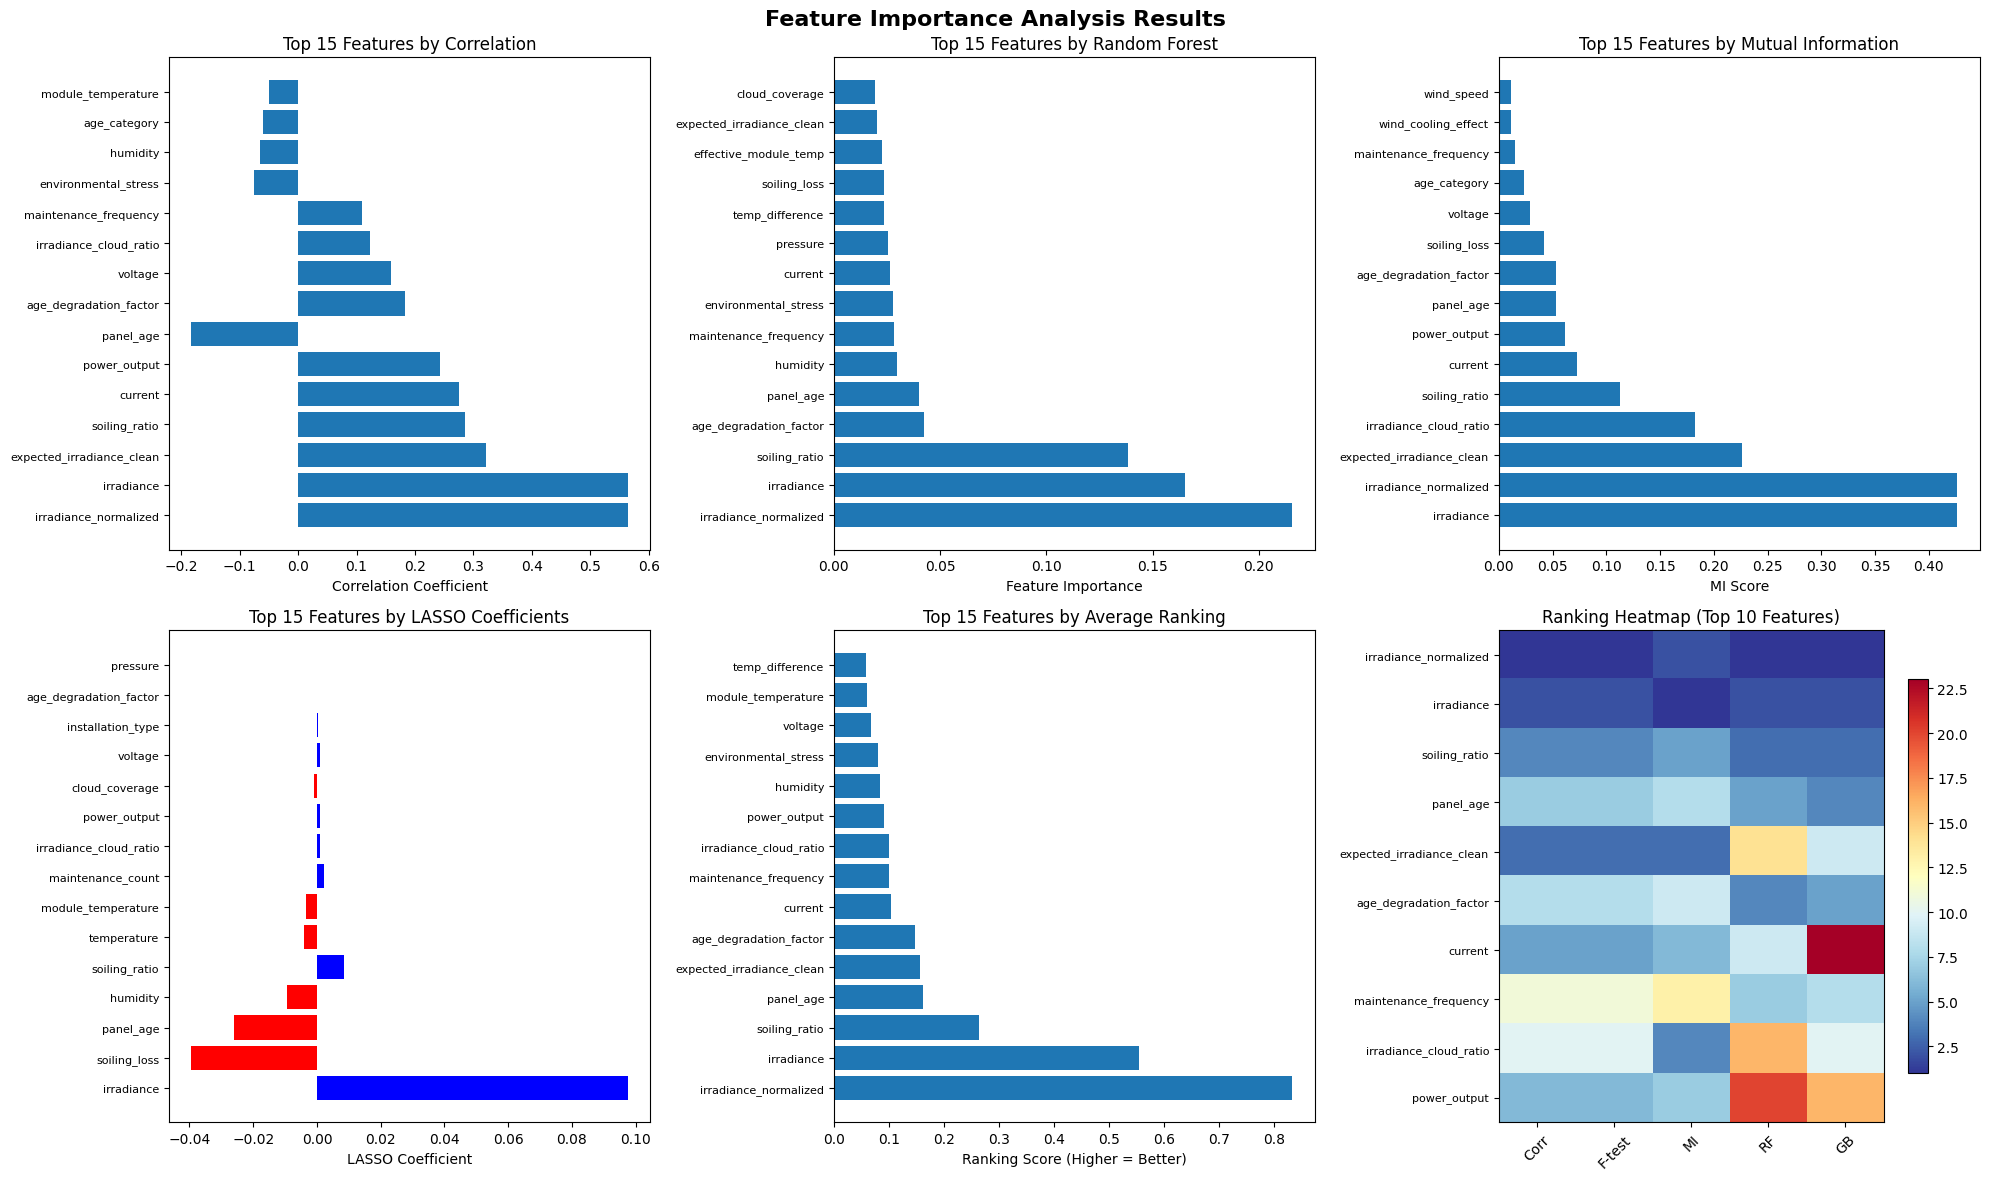


FEATURE SELECTION RECOMMENDATIONS

Top 10 most important features for efficiency prediction:
 1. irradiance_normalized
 2. irradiance
 3. soiling_ratio
 4. panel_age
 5. expected_irradiance_clean
 6. age_degradation_factor
 7. current
 8. maintenance_frequency
 9. irradiance_cloud_ratio
10. power_output

Optimal performance achieved with 20 features:
R² Score: 0.4434
RMSE: 0.1033


In [17]:
from utils.feature_analyzer import FeatureAnalyzer
analyzer = FeatureAnalyzer(df_engineered, target_column='efficiency')
results = analyzer.run_complete_analysis()

In [16]:
top_features = results['top_features']
print("Selected features for modeling:", top_features)

Selected features for modeling: ['irradiance_normalized', 'irradiance', 'soiling_ratio', 'panel_age', 'expected_irradiance_clean', 'age_degradation_factor', 'current', 'maintenance_frequency', 'irradiance_cloud_ratio', 'power_output']
